# Harmonic versus square well

This small tutorial highlight the 'energy_level' function of the plotting submodule. We simulate the smooth transition between a harmonic and finite potential trap, to see the rescaling of the energy modes.

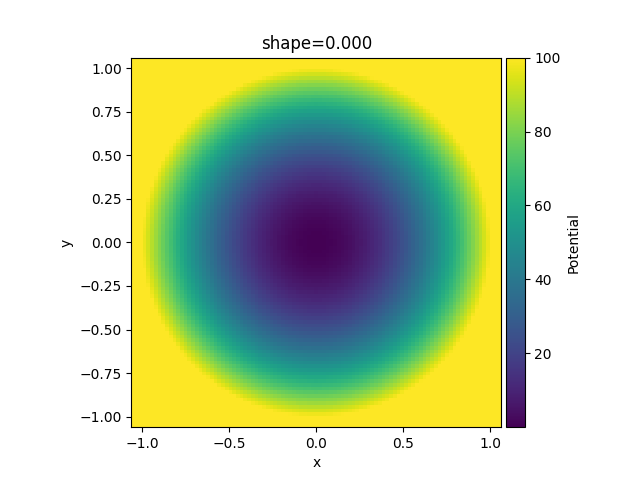

In [1]:

import numpy as np
from bloch_schrodinger.potential import Potential, create_parameter
from bloch_schrodinger.solver import Solver
import xarray as xr
import matplotlib.pyplot as plt


a1 = [2.1,0]
a2 = [0,2.1]

pillar = Potential(
    unitvecs=[a1,a2],
    resolution = (99,100), # slight anisotropy to prevent exact degeneracies, which numerical solvers don't like
    v0 = 100
)


r = 1
shape = create_parameter('shape', np.array([0,1]))
exponent = 1+shape*1000
r0 = 1-0.4*shape

pillar.rectangle(
    center=(0,0),
    dims = (2,2),
    value = 100*(((pillar.x/r0)**2)**exponent + ((pillar.y/r0)**2)**exponent)
)
pillar.V = xr.where(pillar.V>100, 100, pillar.V)

%matplotlib widget
pillar.plot()



In [2]:
solv = Solver(
    potentials = [pillar],
    alphas = [1]
)

eigva, eigve = solv.solve(
    n_eigva=10 # Let's look at the s and p modes
)

100%|██████████| 2/2 [00:03<00:00,  1.80s/it]


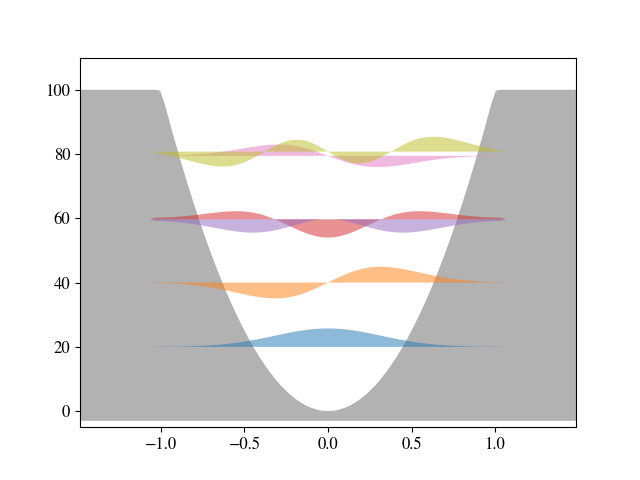

In [3]:
from bloch_schrodinger.plotting import energy_levels

energy_levels(
    eigva = eigva,
    eigve = eigve.real,
    potential = pillar,
    ymin = -5, ymax = 110,
    frac = 0.05,
)
plt.show()